In [1]:
import os
import shutil


base_path = os.getcwd()

parent_path = os.path.dirname(os.path.dirname(base_path))

fig_path = os.path.join(base_path , "figures")
gae_data_path = os.path.join(fig_path, "logistic regression")
if os.path.exists(gae_data_path):
    shutil.rmtree(gae_data_path)
    print(f"Deleted folder: {gae_data_path}")
else:
    print(f"Folder does not exist: {gae_data_path}")

os.makedirs(fig_path, exist_ok=True)


os.makedirs(gae_data_path, exist_ok=True)

Deleted folder: c:\Users\sarab\OneDrive\Desktop\CSIR\generative_model_compare\figures\logistic regression


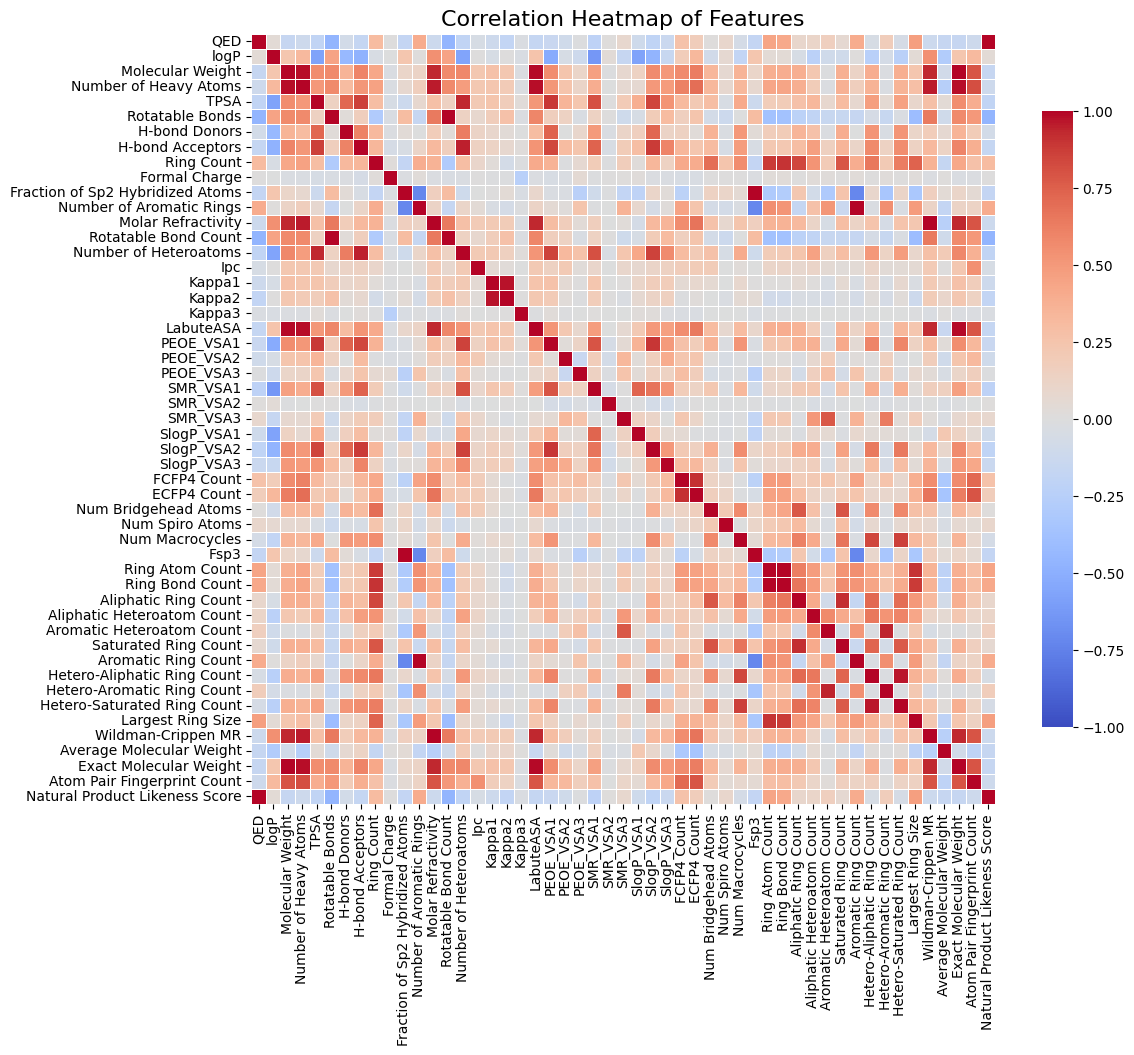

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

data = pd.read_excel('data/curated dataset/curated_dataset_molecular_properties.xlsx')


X = data.drop(['SMILES', 'descriptors', 'frag_likeliness'], axis=1)
X = X.select_dtypes(include=[np.number])  # Ensure all features are numeric


corr = X.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1, center=0, cbar_kws={'shrink': .8})
plt.title('Correlation Heatmap of Features', fontsize=16)


output_folder = 'figures/logistic regression/heatmaps/'  
os.makedirs(output_folder, exist_ok=True)  
dpi_values = [300, 600, 1200]  

for dpi in dpi_values:
    plt.savefig(f"{output_folder}correlation_heatmap_{dpi}dpi.png", dpi=dpi, bbox_inches='tight')


plt.show()

In [3]:
def plot_roc_curve(y_true, y_pred_prob, model_name):
    
    fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)


    plt.figure(figsize=(10, 8))

    
    plt.plot(fpr, tpr, color='darkorange', lw=3, label=f'ROC curve (area = {roc_auc:.2f})')


    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')

    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    
    plt.xlabel('False Positive Rate', fontsize=18, fontweight='bold')
    plt.ylabel('True Positive Rate', fontsize=18, fontweight='bold')
    plt.title(f'ROC Curve for {model_name}', fontsize=20, fontweight='bold')

    
    plt.legend(loc='lower right', prop={'size': 14, 'weight': 'bold'})

    
    plt.xticks(fontsize=14, fontweight='bold')  
    plt.yticks(fontsize=14, fontweight='bold')  

    
    plt.grid(True, linestyle='--', alpha=0.7)

    
    plt.tight_layout()

    output_folder = 'figures/logistic regression/ROC AUC/'  

    os.makedirs(output_folder, exist_ok=True)  
    dpi_values = [300, 600, 1200]  

    for dpi in dpi_values:
        plt.savefig(f"{output_folder}correlation_heatmap_{dpi}dpi.png", dpi=dpi, bbox_inches='tight')
    plt.show()

In [4]:

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=classes, yticklabels=classes,
                linewidths=0.5, linecolor='black')
    plt.xlabel('Predicted Labels', fontsize=14)
    plt.ylabel('True Labels', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    output_folder = 'figures/logistic regression/Confusion Matrix/'  
    os.makedirs(output_folder, exist_ok=True)  
    dpi_values = [300, 600, 1200]  

    for dpi in dpi_values:
        plt.savefig(f"{output_folder}correlation_heatmap_{dpi}dpi.png", dpi=dpi, bbox_inches='tight')
    plt.show()

c:\Users\sarab\miniconda3\envs\ENV4\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\sarab\miniconda3\envs\ENV4\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\sarab\miniconda3\envs\ENV4\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Initial VIF:
                             Feature       VIF
0                                QED  0.098205
1                               logP  0.999796
2                   Molecular Weight  0.299668
3                    Rotatable Bonds  0.523401
4                         Ring Count  0.873277
5                      Formal Charge  0.999686
6   Fraction of Sp2 Hybridized Atoms  0.263798
7           Number of Aromatic Rings  0.791741
8                                Ipc  1.237964
9                             Kappa1  0.825312
10                            Kappa3  0.998421
11                         PEOE_VSA2  0.726521
12                         PEOE_VSA3  0.817641
13                          SMR_VSA2  0.991069
14                          SMR_VSA3  0.897198
15                        SlogP_VSA3  0.546333
16                       FCFP4 Count  0.214786
17                   Num Spiro Atoms  0.991984
18        Aliphatic Heteroatom Count  0.909384
19          Average Molecular Weight  0.085286


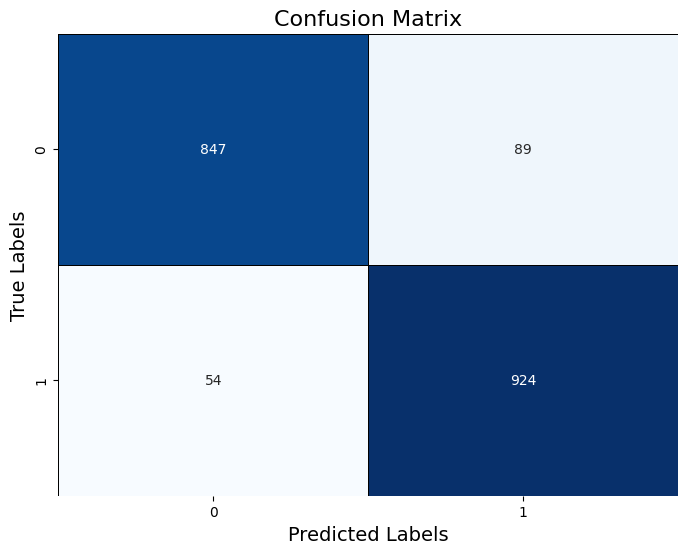

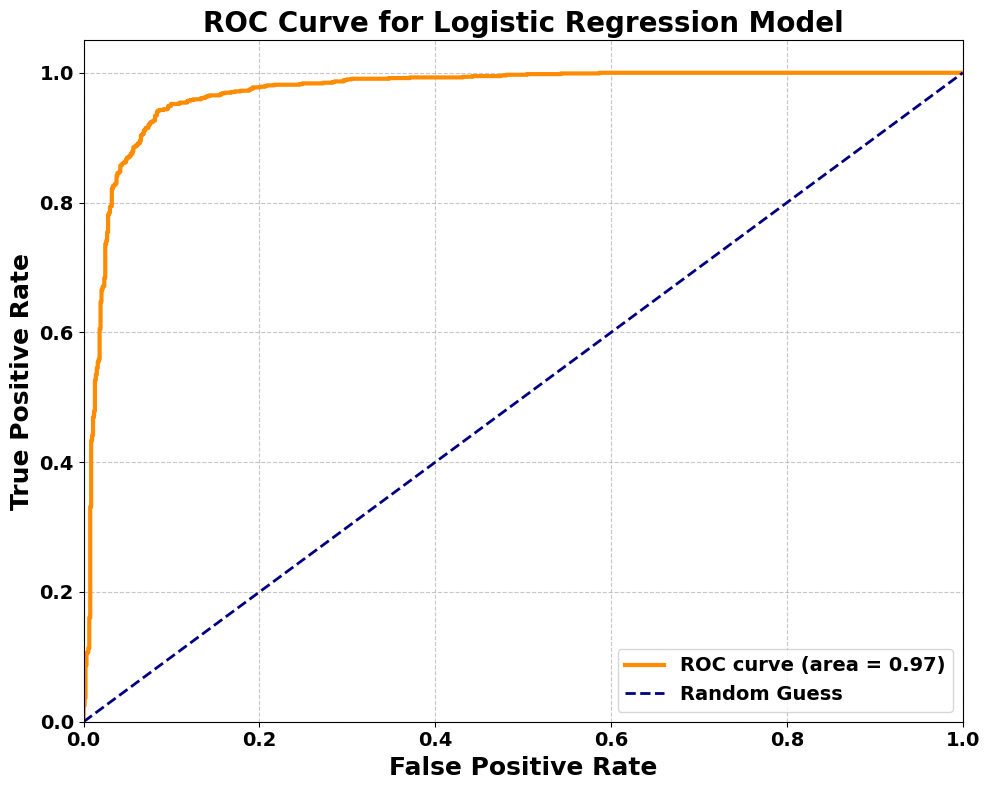


Top 5 Selected Features and Importances:
logP: 5.2019
Molecular Weight: 4.1472
SlogP_VSA3: 1.0310
Fraction of Sp2 Hybridized Atoms: 0.9714
FCFP4 Count: 0.8394

Prediction Equation:
frag_likeliness = -3.6592 + (7.0771 * logP) + (-6.2811 * Molecular Weight) + (1.1403 * SlogP_VSA3) + (0.5869 * Fraction of Sp2 Hybridized Atoms) + (1.9262 * FCFP4 Count)

Model and scaler saved for future use.


In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, roc_curve, auc, roc_auc_score, 
                             mean_squared_error, f1_score, accuracy_score, classification_report)
from statsmodels.stats.outliers_influence import variance_inflation_factor
import joblib
import shap
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, roc_auc_score


data = pd.read_excel('data/curated dataset/curated_dataset_molecular_properties.xlsx')


X = data.drop(['SMILES', 'descriptors', 'frag_likeliness'], axis=1)
y = data['frag_likeliness']


X = X.select_dtypes(include=[np.number])


original_num_attributes = X.shape[1]


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


def remove_highly_correlated_features(X, threshold=0.75):
    corr_matrix = X.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
    return X.drop(columns=to_drop), to_drop


X, dropped_features_corr = remove_highly_correlated_features(X_resampled, threshold=0.75)


def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data


vif_data = calculate_vif(X)
print("Initial VIF:")
print(vif_data)

vif_threshold = 5
dropped_features_vif = []
while vif_data["VIF"].max() > vif_threshold:
    remove = vif_data.sort_values("VIF", ascending=False).iloc[0]
    X = X.drop(columns=[remove["Feature"]])
    dropped_features_vif.append(remove["Feature"])
    vif_data = calculate_vif(X)
    print(f"Removed {remove['Feature']} with VIF = {remove['VIF']:.2f}")


num_dropped_corr = len(dropped_features_corr)
num_dropped_vif = len(dropped_features_vif)
num_available_attributes = X.shape[1]

print(f"\nOriginal number of attributes: {original_num_attributes}")
print(f"Number of attributes removed due to high correlation (> 0.75): {num_dropped_corr}, Names: {dropped_features_corr}")
print(f"Number of attributes removed due to VIF (> {vif_threshold}): {num_dropped_vif}, Names: {dropped_features_vif}")
print(f"Number of attributes available for building the equation: {num_available_attributes}")


X_train, X_test, y_train, y_test = train_test_split(X, y_resampled, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LogisticRegression()
model.fit(X_train_scaled, y_train)


explainer = shap.LinearExplainer(model, X_train_scaled)
shap_values = explainer.shap_values(X_train_scaled)


shap_df = pd.DataFrame(shap_values, columns=X.columns)

top_features = shap_df.abs().mean().nlargest(5)
top_feature_names = top_features.index.tolist()
top_feature_importances = top_features.values.tolist()


X_train_selected = X_train[top_feature_names]
X_test_selected = X_test[top_feature_names]


model.fit(scaler.fit_transform(X_train_selected), y_train)


y_pred = model.predict(scaler.transform(X_test_selected))
y_pred_prob = model.predict_proba(scaler.transform(X_test_selected))[:, 1]


cm = confusion_matrix(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)
# Print evaluation metrics
print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
# Plot confusion matrix
plot_confusion_matrix(cm, classes=[0, 1])


plot_roc_curve(y_test, y_pred_prob, 'Logistic Regression Model')

coefficients = model.coef_[0]
intercept = model.intercept_[0]

equation = f"frag_likeliness = {intercept:.4f}"
for feature, coef in zip(top_feature_names, coefficients):
    equation += f" + ({coef:.4f} * {feature})"

print("\nTop 5 Selected Features and Importances:")
for feature, importance in zip(top_feature_names, top_feature_importances):
    print(f"{feature}: {importance:.4f}")

print("\nPrediction Equation:")
print(equation)
# Save the model and scaler
joblib.dump(model, 'frag_likeliness_model.joblib')
joblib.dump(scaler, 'feature_scaler.joblib')
print("\nModel and scaler saved for future use.")


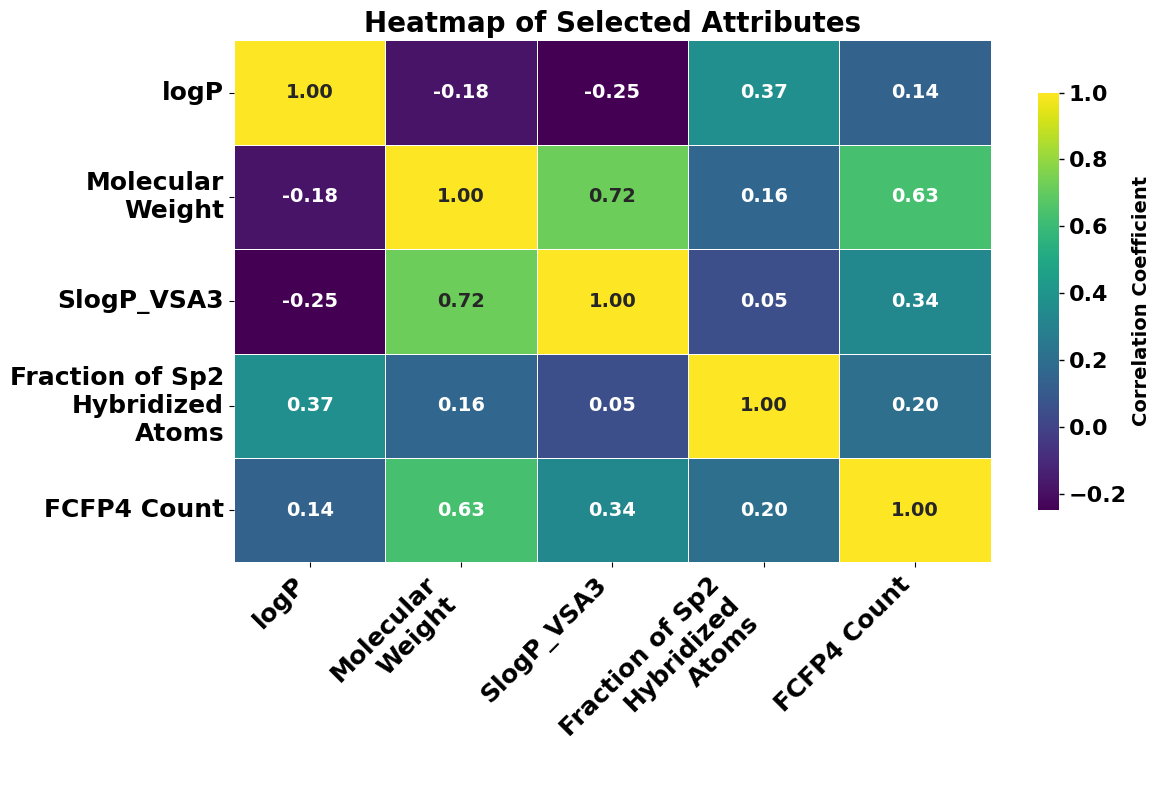

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import textwrap  


correlation_matrix = X[top_feature_names].corr()


plt.figure(figsize=(12, 8))


def wrap_labels(labels, width=15):  # Set the maximum width
    return ['\n'.join(textwrap.wrap(label, width)) for label in labels]


wrapped_feature_names_x = wrap_labels(top_feature_names)
wrapped_feature_names_y = wrap_labels(top_feature_names)


heatmap = sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="viridis",  
    linewidths=0.5,  
    linecolor='white',  
    cbar_kws={"shrink": 0.8},  
    xticklabels=wrapped_feature_names_x,  
    yticklabels=wrapped_feature_names_y,  
    annot_kws={"size": 14, "weight": "bold"}  
)


colorbar = heatmap.collections[0].colorbar
colorbar.set_label('Correlation Coefficient', fontsize=14, fontweight='bold')


colorbar.ax.tick_params(labelsize=16, width=1)
for label in colorbar.ax.get_yticklabels():
    label.set_fontweight('bold')  


plt.title('Heatmap of Selected Attributes', fontsize=20, fontweight='bold')


plt.xticks(fontsize=18, rotation=45, ha='right', fontweight='bold')  
plt.yticks(fontsize=18, rotation=0, fontweight='bold')  


min_corr = np.min(correlation_matrix.values[np.triu_indices_from(correlation_matrix, k=1)])
max_corr = np.max(correlation_matrix.values[np.triu_indices_from(correlation_matrix, k=1)])

# Show the plot
plt.tight_layout()  
output_folder = 'figures/logistic regression/Heatmap of Selected Attributes/'  
os.makedirs(output_folder, exist_ok=True)
dpi_values = [300, 600, 1200]  

for dpi in dpi_values:
    plt.savefig(f"{output_folder}correlation_heatmap_{dpi}dpi.png", dpi=dpi, bbox_inches='tight')
plt.show()
